In [16]:
import numpy as np
import cv2
from iced import filter
from iced import normalization
from library.utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
from iced import normalization
from iced import filter
from scipy.stats import t
import os
%load_ext autoreload
%autoreload 2
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


Number of rows and columns: 1, 1


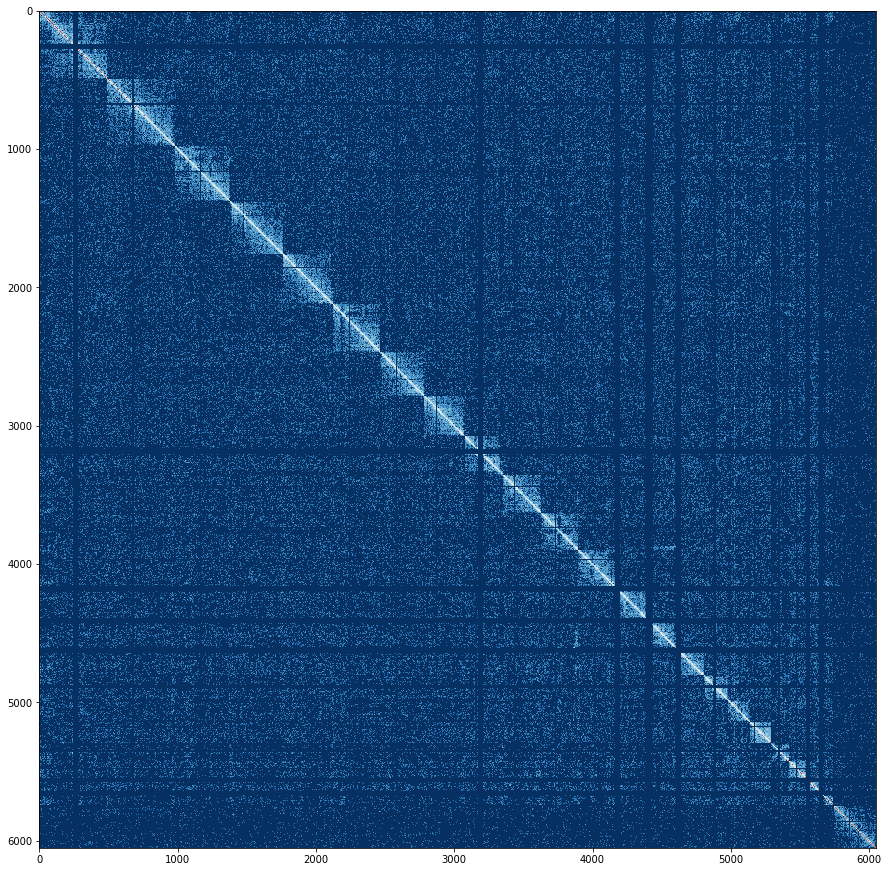

In [17]:
images = []
for name in data_names:
    images.append(np.load('../numpy_data/all_low_res.npy'))
showImages(images)

In [144]:
k = (2, 2, 2, 2)
method = 'max'
t = 0
params = None
symmetric=True
local_thresholds_normed = {}
local_thresholds_original = {}
for name in data_names:
    local_thresholds_normed[name] = \
    local_threshold(((normed[name][:400, :400]+1e-5)),\
            k = k, method=method, t = t,\
            params=params, symmetric=symmetric)
    local_thresholds_original[name] = \
    local_threshold(((grand_scheme_of_things[name][:400, :400]+1e-5)),\
            k = k, method=method, t = t,\
            params=params, symmetric=symmetric)

(2, 2, 2, 2)
(2, 2, 2, 2)


Number of rows and columns: 1, 4


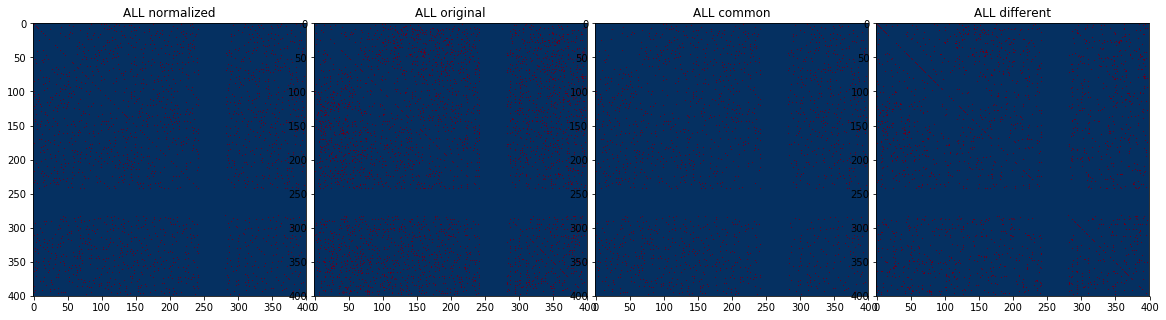

In [154]:
pylab.rcParams['figure.figsize'] = (20, 20)
images = []
titles = []
for name in data_names:
    images.append(local_thresholds_normed[name])
    images.append(local_thresholds_original[name])
    images.append(local_thresholds_normed[name] \
                  * local_thresholds_original[name])
    images.append((local_thresholds_normed[name] \
                  - local_thresholds_original[name]) != 0)        
    titles.append("%s normalized"%name)
    titles.append("%s original"%name)
    titles.append("%s common"%(name))
    titles.append("%s different"%(name))
showImages(images, rows=len(data_names), titles=titles)